# Bike_Sharing_in_Washington_D.C

In [133]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [55]:
data=pd.read_csv('day.csv')

In [56]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [57]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


##  Data Cleaning

In [58]:
del data['instant'] #unique
data['dteday']=pd.to_datetime(data['dteday']) #Change dteday to datetime

Next step is to change season, yr, mnth, holiday, weekday, workingday, weathersit to categorical types

In [59]:
cat_list=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for i in cat_list:
    data[i]=data[i].astype('category')

## Visualize data

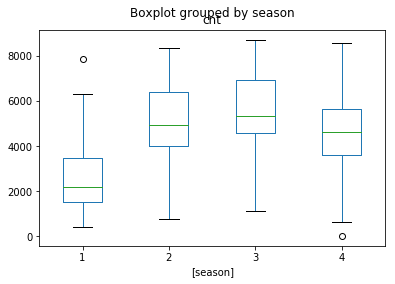

In [60]:
data[['season','cnt']].boxplot(by='season',grid=False)

There are fewer rent in spinger and winter; highest in summer and fall 

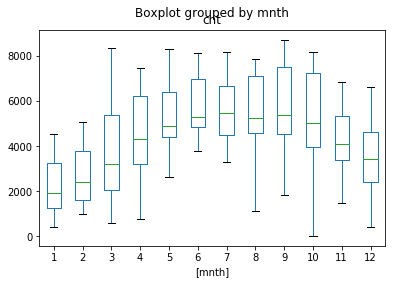

In [61]:
data[['mnth','cnt']].boxplot(by='mnth',grid=False)

Similar trend can be found verus month

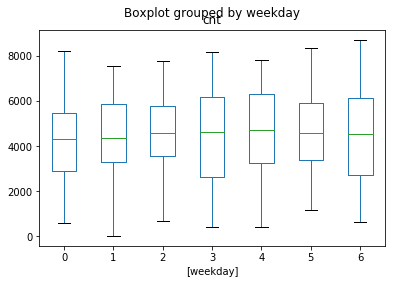

In [62]:
data[['weekday','cnt']].boxplot(by='weekday',grid=False)

Not much sharp difference on weekday 

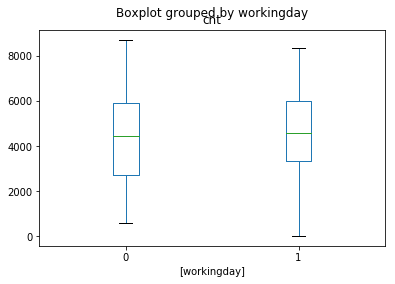

In [63]:
data[['workingday','cnt']].boxplot(by='workingday',grid=False)

Neither on either working day or holiday 

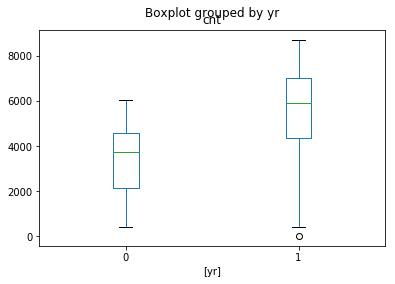

In [64]:
data[['yr','cnt']].boxplot(by='yr',grid=False)

There are more bike renting in yr=1 (ie Year 2012)

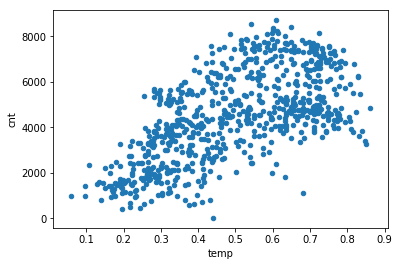

In [65]:
data.plot.scatter(x='temp',y='cnt')

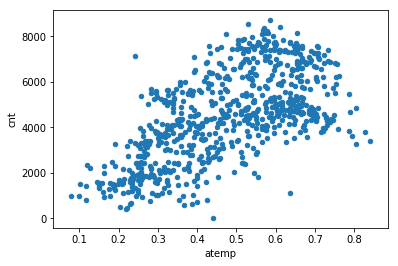

In [66]:
data.plot.scatter(x='atemp',y='cnt')

From two scatter plots, there seems a positive correlation between temperture / feeling temperature and no of bikes rented 

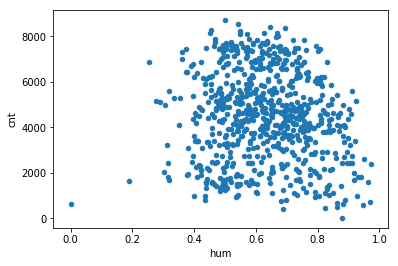

In [67]:
data.plot.scatter(x='hum',y='cnt')

There is no significant correlation between humidity and count 

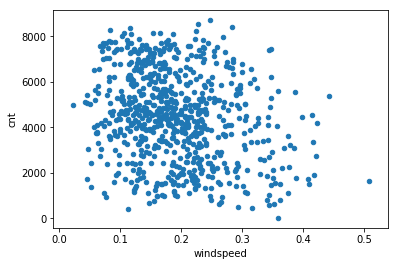

In [68]:
data.plot.scatter(x='windspeed',y='cnt')

Neither do between windspeed and count 

## PCA decomposition

There are 4 variables related to weather. We can try to use PCA to decompose into fewer variables

In [69]:
data_weather=data[['temp','atemp','hum','windspeed']]

In [70]:
scaler=StandardScaler()

In [71]:
scaler.fit(data_weather)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [72]:
data_weather_std=scaler.transform(data_weather)

In [73]:
data_weather_std

array([[-0.82666213, -0.67994602,  1.25017133, -0.38789169],
       [-0.72109471, -0.74065231,  0.47911298,  0.74960172],
       [-1.63465665, -1.749767  , -1.33927398,  0.74663186],
       ...,
       [-1.32322427, -1.42434419,  0.87839173, -0.85355213],
       [-1.30955752, -1.49004895, -1.01566357,  2.06944426],
       [-1.52822548, -1.54048197, -0.35406086, -0.46020122]])

In [74]:
pca=PCA()

In [75]:
pca.fit(data_weather_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [76]:
pca.explained_variance_ratio_

array([0.52532844, 0.28512609, 0.18756327, 0.0019822 ])

Apparently 2 variables can already explain over 80% of variance. Let's keep only 2 variables in new dataset

In [83]:
pca.n_components_ 

4

In [78]:
pca_2=PCA(n_components=2)

In [79]:
pca_2.fit(data_weather_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [80]:
pca_2.transform(data_weather_std)

array([[ 0.62940328, -1.46865666],
       [ 1.06008225, -0.19382768],
       [ 2.73805977,  0.60126377],
       ...,
       [ 1.41839681, -1.8035693 ],
       [ 2.61657425,  1.36866659],
       [ 2.00278781, -0.77939774]])

In [89]:
data_weather_2=pd.DataFrame(data=pca_2.transform(data_weather_std),columns=['Component1','Component2'])

In [95]:
data_pca =pd.concat([data[data.columns.difference(['temp','atemp','hum','windspeed'])],data_weather_2],axis=1)

In [96]:
data_pca.head()

,casual,cnt,dteday,holiday,mnth,registered,season,weathersit,weekday,workingday,yr,Component1,Component2
0,331,985,2011-01-01,0,1,654,1,2,6,0,0,0.629403,-1.468657
1,131,801,2011-01-02,0,1,670,1,2,0,0,0,1.060082,-0.193828
2,120,1349,2011-01-03,0,1,1229,1,1,1,1,0,2.738060,0.601264
3,108,1562,2011-01-04,0,1,1454,1,1,2,1,0,2.104932,-0.833926
4,82,1600,2011-01-05,0,1,1518,1,1,3,1,0,2.261075,0.189561


## Linear analysis

Let's have a linear analysis to see if there is any relation between workday,holiday,weather and number of bike rented 

In [124]:
data_pca_2= data_pca[data_pca.columns.difference(['dteday'])]

In [125]:
category_variable = list(data_pca_2.select_dtypes(include='category').columns.values)

In [126]:
for i in category_variable:
    data_category=pd.get_dummies(data_pca_2[i])
    data_category = data_category.add_prefix("{}#".format(i))
    data_pca_2.drop(i,axis=1, inplace=True)
    data_pca_2=data_pca_2.join(data_category)

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [127]:
data_pca_2.head()

,Component1,Component2,casual,cnt,registered,holiday#0,holiday#1,mnth#1,mnth#2,mnth#3,...,weekday#1,weekday#2,weekday#3,weekday#4,weekday#5,weekday#6,workingday#0,workingday#1,yr#0,yr#1
0,0.629403,-1.468657,331,985,654,1,0,1,0,0,...,0,0,0,0,0,1,1,0,1,0
1,1.060082,-0.193828,131,801,670,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,2.738060,0.601264,120,1349,1229,1,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0
3,2.104932,-0.833926,108,1562,1454,1,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
4,2.261075,0.189561,82,1600,1518,1,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0


To test how good is the linear model, will split into training set and test sets 

In [134]:
data_y=data_pca_2[['cnt','casual','registered']]
data_x=data_pca_2[data_pca_2.columns.difference(['cnt','casual','registered'])]

In [135]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y)

In [136]:
linear_model=linear_model.LinearRegression()

In [137]:
model=linear_model.fit(X_train,y_train)

In [139]:
model.score(X_test,y_test)

0.8131195187861557

The linear model can explain over 80% of variation. Not bad!